Nama:Maulana Yusup
Kelas:Pagi B
Nim:221351076

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Deskripsi library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/streamlit-motor-main/DataBike.csv')

# Deskripsi Dataset

In [5]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


<Axes: >

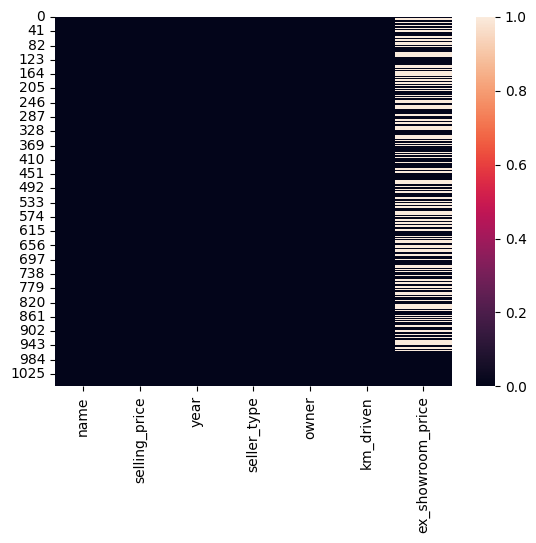

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


# Visualisasi Data

<ipython-input-10-ee535b2cc5be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

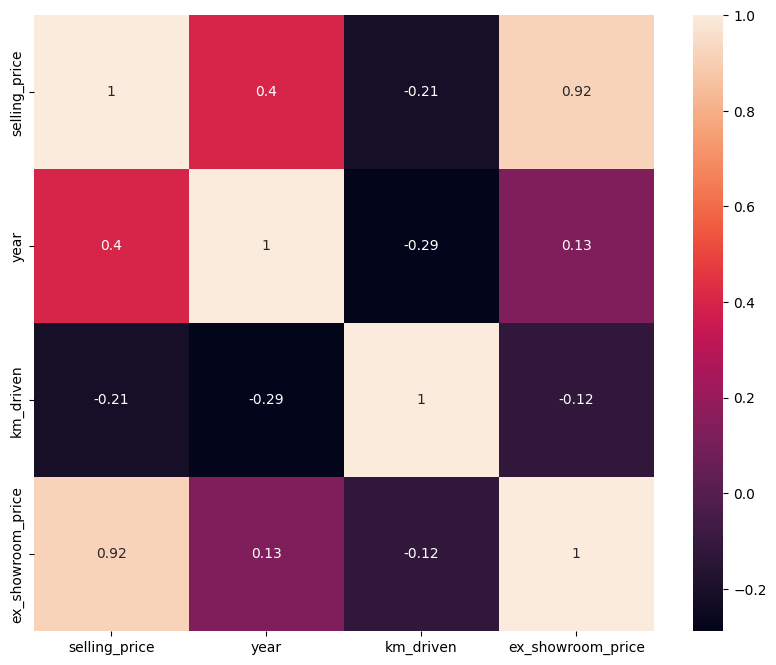

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [11]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [12]:
df.ex_showroom_price.fillna(df.ex_showroom_price.mode()[0],inplace=True)

In [13]:
df.isnull().sum()


name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

# Encoding Columns

In [14]:
df.replace({'owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)
df.replace({'seller_type':{'Dealer':0,'Individual':1}},inplace=True)
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,1,0,350,50267.0
1,Honda Dio,45000,2017,1,0,5650,50267.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1,0,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1,0,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,1,1,21000,50267.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,1,0,500000,52000.0
1057,Honda CB twister,16000,2012,1,0,33000,51000.0
1058,Bajaj Discover 125,15000,2013,1,1,35000,57000.0
1059,Honda CB Shine,12000,2009,1,0,53000,58000.0


# Jumlah Motor Berdasarkan tahun

In [15]:
models = df.groupby('year').count()[['km_driven']].sort_values(by='km_driven', ascending=True).reset_index()
models = models.rename(columns={'km_driven':'numberOfMotors'})

<Axes: xlabel='year', ylabel='numberOfMotors'>

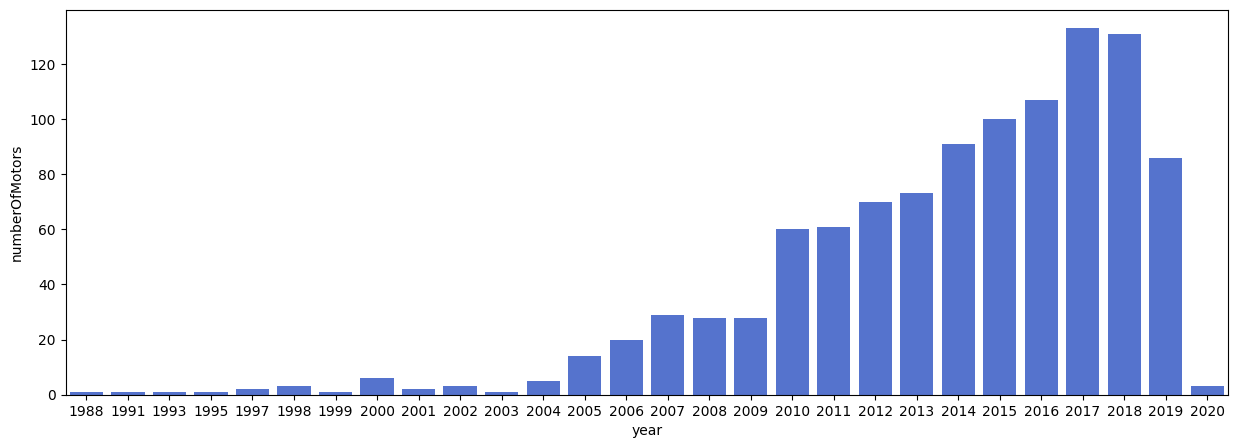

In [16]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['year'], y=models['numberOfMotors'], color='royalblue')

# Berdasarkan nama Motor

In [17]:
nama = df.groupby('name').count()[['km_driven']].sort_values(by='km_driven', ascending=True).reset_index()
nama = nama.rename(columns={'km_driven':'count'})

<Axes: xlabel='name', ylabel='count'>

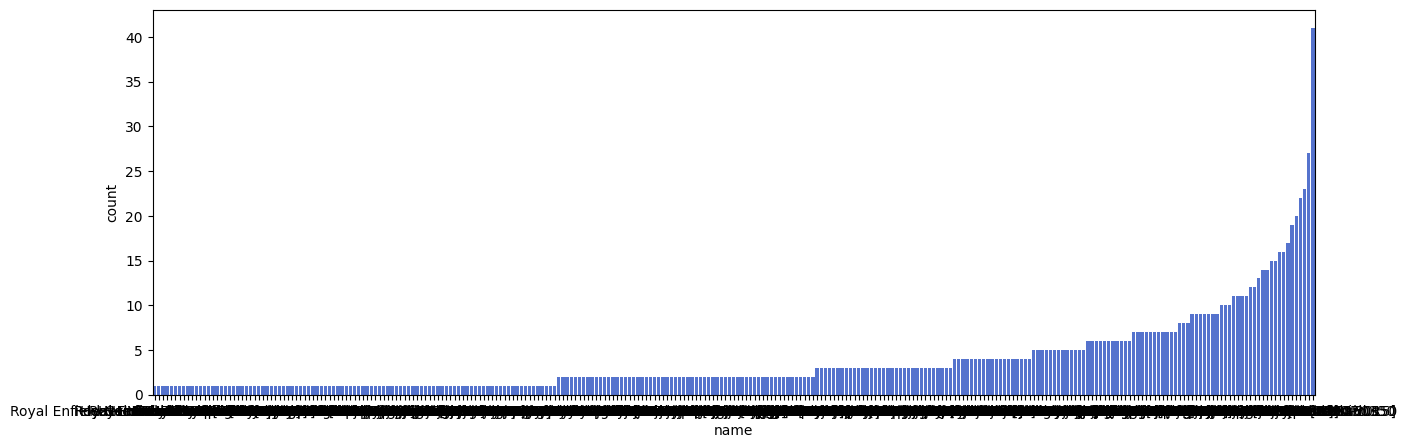

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x=nama['name'], y=nama['count'], color='royalblue')

# Distribusi km_driven

<ipython-input-19-2fb1f1933db2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['km_driven'])


<Axes: xlabel='km_driven', ylabel='Density'>

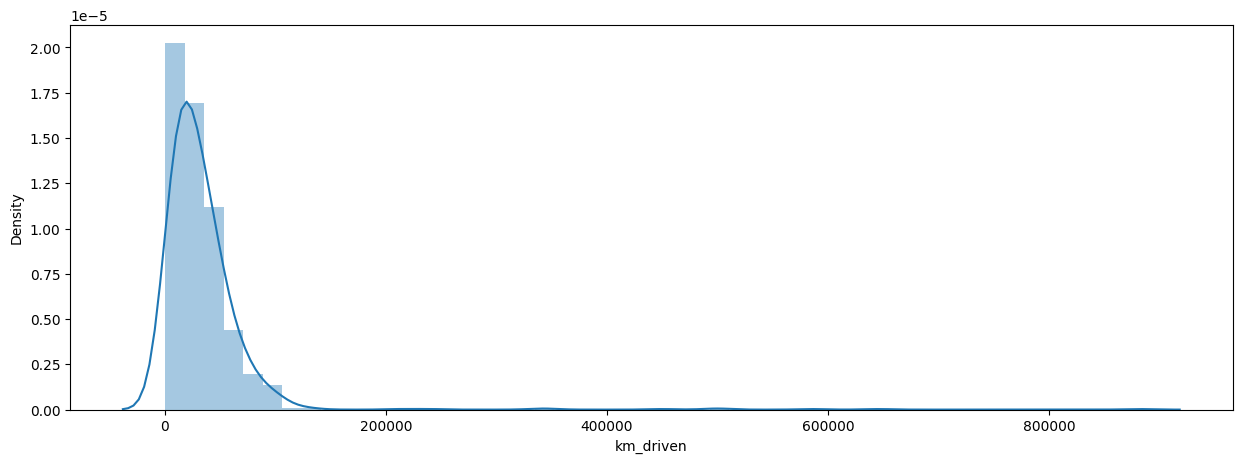

In [19]:
plt.figure(figsize=(15,5))
sns.distplot(df['km_driven'])

# Distribusi harga Motor

<ipython-input-20-1f70cee33e82>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])


<Axes: xlabel='selling_price', ylabel='Density'>

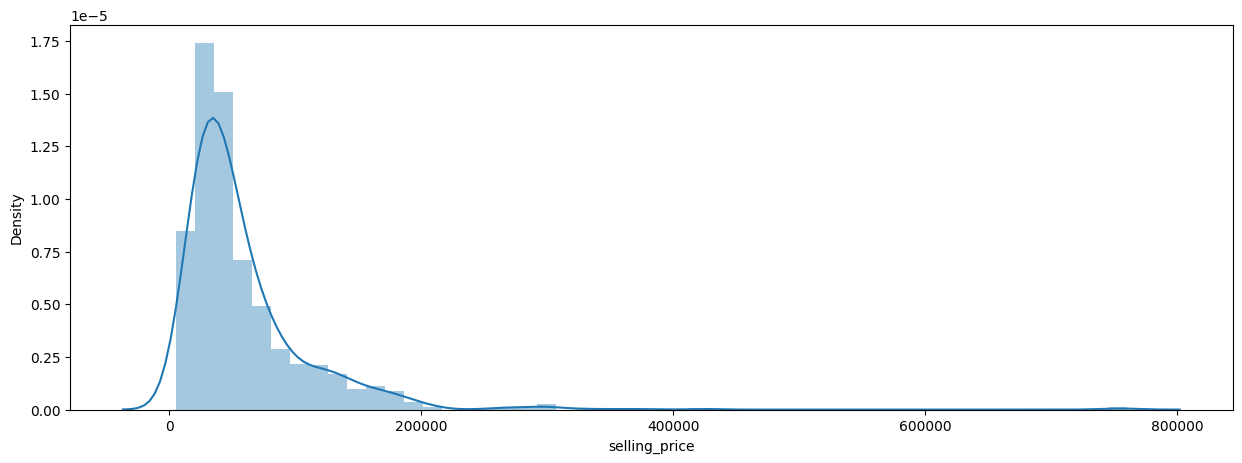

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(df['selling_price'])

# Seleksi Fitur / Data yang di inginkan

In [21]:
features = ['year', 'km_driven']
x = df[features]
y = df['selling_price']
x.shape, y.shape

((1061, 2), (1061,))

# Spliting The Dataset

In [22]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(266,)

# Membuat model Regresi Linier

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [24]:
score = lr.score(X_test, y_test)
print('Akurasi Model Regresi Linier = ', score)

Akurasi Model Regresi Linier =  0.17902720678764172


# Membuat inputan model Regresi Linier

In [25]:
#selling_price=45000, year=2017
input_data = np.array([[45000,2017]])

prediction = lr.predict(input_data)
print('Estimasi Harga Motor : ', prediction)

Estimasi Harga Motor :  [2.10355363e+08]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Menyimpan model

In [26]:
import pickle

filename = 'estimasi_motor.sav'
pickle.dump(lr,open(filename,'wb'))